<a href="https://colab.research.google.com/github/yGit741/comdepri/blob/main/accuracy_simulation_210121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import random

In [2]:
def NG(k=0.5, s=0.5, n=12,current_aspect = 1):
    T = s**n
    B = (s**n)+(k**n)
    neural_gain = (T/B)*((-1)**current_aspect)
    return neural_gain


In [3]:
stim_sample = ['global','local']
aspect = [1, 0] #0 is for global, 1 is for local

In [4]:
#RT function
def RT(k=0.5, global_s=0.55, local_s=0.45, n=12, upper_b=5, p_global=50, intention='global', congruent=True, max_iter=20000):
    #print ('RT in')
    p_local=100-p_global
    lower_b=-upper_b
    NG_sum = 0
    time = 0


    while NG_sum < upper_b and NG_sum > lower_b:
        current_sample = random.choices(stim_sample, weights=(p_global, p_local), k=1)

        #print(current_sample)
        current_aspect = 0 if current_sample == ['global'] else 1
        #print('aspect is', current_aspect)
        signal = global_s if current_sample == ['global'] else local_s
        #print('signal is', signal)
        gain = 0
        if congruent:
            if intention == 'global':
                gain = NG(k, signal, n, 0)
                NG_sum = NG_sum + gain
                time = time + 1
            else:
                gain = NG(k, signal, n, 1)
                NG_sum = NG_sum + gain
                time = time + 1
        else:
            gain = NG(k, signal, n, current_aspect)
            NG_sum = NG_sum + gain
            time = time + 1
        #print(time)
        #print(NG_sum)
        if time > max_iter:
            break

    if NG_sum >= upper_b:
        ans = 'global'
    if NG_sum <= lower_b:
        ans = 'local'
    #print ('RT out')
    return intention, ans, time


In [5]:
def df_accuracy(N=100, global_s=0.55, local_s=0.45, n=12, p_global=50):
    base_array = np.zeros(N)
    accuracy_by_con = lambda x: RT(congruent = x, global_s=global_s, local_s=local_s, n=n, p_global=p_global)
    RT_array = np.array([accuracy_by_con(xi) for xi in base_array])
    df = pd.DataFrame(data=RT_array, columns=['intention', 'answer', 'time'])
    df['right'] = np.where(df['intention'] == df['answer'], 1, 0)
    df['con'] = base_array
    total = df['right'].sum()
    return total/N


In [ ]:
def plot_acc_by_prob(N=100, min=0, max=61, step = 1, global_s=0.55, local_s=0.45, n=12):
    prob_range = np.array(range(min,max,step))
    acc_by_prob = lambda y: df_accuracy(N=N, p_global=y, global_s=global_s, local_s=local_s, n=n)
    ar2 = np.array([acc_by_prob(yi) for yi in prob_range])
    plt.scatter(prob_range, ar2)
    plt.title('Accuracy by Probability')
    plt.xlabel('probability')
    plt.ylabel('accuracy')
    return plt.show()

Accuracy by Probability Plot:
This plot shows the accuracy (fraction of times global boundaries are reached) by the probability. Other parameters can be altered to show how they affect the accuracy.


In [ ]:
_=interact(plot_acc_by_prob, n=(1.,15,1.), global_s =(0,1.,0.02), local_s=(0,1.,0.02))
print(_)


interactive(children=(IntSlider(value=100, description='N', max=300, min=-100), IntSlider(value=0, description…

<function plot_acc_by_prob at 0x7fb435340cb0>


In [6]:
def df_average(N=100, global_s=0.55, local_s=0.45, n=12, p_global=48, intention = 'global'):
    incon_array = np.zeros(N)
    rt_by_con = lambda x: RT(congruent = x, global_s=global_s, local_s=local_s, n=n, p_global=p_global, intention = intention)
    ar = np.array([rt_by_con(xi) for xi in incon_array])
    df = pd.DataFrame(data=ar, columns=['intention', 'answer', 'time'])
    df['right'] = np.where(df['intention'] == df['answer'], 1, 0)
    df['con'] = incon_array
    print('whole dataframe', '\n' , df)
    df['time'] = pd.to_numeric(df['time'])
    #df1 = df.loc[lambda df: df['right'] == 1]
    #accuracy = df1.shape[0]/N
    #print('acc by cut', accuracy)
    mean_by_right = df[['right', 'time']].groupby('right').agg(['count', 'mean']).reset_index()
    print("mean by right and wrong", '\n', mean_by_right)
    print(list(mean_by_right.columns))  
    print(mean_by_right.shape)

    
    if 0 in mean_by_right[('right', '')].values:
      accuracy_of_false_decisions_list = mean_by_right[mean_by_right[('right','')] == 0][('time', 'count')].values.tolist()
      print(accuracy_of_false_decisions_list)
      accuracy_of_false_decisions = accuracy_of_false_decisions_list[0]/N
      average_of_false_decisions_list = mean_by_right[mean_by_right[('right','')] == 0][('time', 'mean')].values.tolist()
      average_of_false_decisions = average_of_false_decisions_list[0]
    else:
      accuracy_of_false_decisions = 0
      average_of_false_decisions = 'none'
     

    if 1 in mean_by_right[('right', '')].values:
      accuracy_of_right_decisions_list = mean_by_right[mean_by_right[('right','')] == 1][('time', 'count')].values.tolist()
      print(accuracy_of_right_decisions_list)
      accuracy_of_right_decisions = accuracy_of_right_decisions_list[0]/N
      average_of_right_decisions_list = mean_by_right[mean_by_right[('right','')] == 1][('time', 'mean')].values.tolist()
      average_of_right_decisions = average_of_right_decisions_list[0]
    else:
      accuracy_of_right_decisions = 0
      average_of_right_decisions = 'none'
    print(accuracy_of_right_decisions)
    print(accuracy_of_false_decisions)
    print(average_of_right_decisions)
    print(average_of_false_decisions)  

 

    return accuracy_of_right_decisions, average_of_right_decisions, average_of_false_decisions 

    


print('av time is',df_average(n=12, p_global = 15))

whole dataframe 
    intention answer time  right  con
0     global  local   54      0  0.0
1     global  local   50      0  0.0
2     global  local   32      0  0.0
3     global  local   72      0  0.0
4     global  local   63      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   68      0  0.0
96    global  local   45      0  0.0
97    global  local   45      0  0.0
98    global  local   63      0  0.0
99    global  local   90      0  0.0

[100 rows x 5 columns]
mean by right and wrong 
   right  time           
        count       mean
0     0    99  70.484848
1     1     1  83.000000
[('right', ''), ('time', 'count'), ('time', 'mean')]
(2, 3)
[99]
[1]
0.01
0.99
83.0
70.48484848484848
av time is (0.01, 83.0, 70.48484848484848)


whole dataframe 
    intention answer time  right  con
0      local  local   14      1  0.0
1      local  local   32      1  0.0
2      local  local   16      1  0.0
3      local  local   12      1  0.0
4      local  local   23      1  0.0
..       ...    ...  ...    ...  ...
95     local  local   25      1  0.0
96     local  local   12      1  0.0
97     local  local   18      1  0.0
98     local  local   18      1  0.0
99     local  local   18      1  0.0

[100 rows x 5 columns]
mean by right and wrong 
   right  time      
        count  mean
0     1   100  18.9
[('right', ''), ('time', 'count'), ('time', 'mean')]
(1, 3)
[100]
1.0
0
18.9
none
whole dataframe 
    intention answer time  right  con
0      local  local   17      1  0.0
1      local  local   22      1  0.0
2      local  local   17      1  0.0
3      local  local   15      1  0.0
4      local  local   34      1  0.0
..       ...    ...  ...    ...  ...
95     local  local   22      1  0.0
96     local  local   15      1 

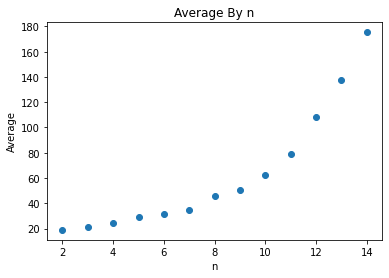

None


In [10]:
def plot_average_by_n(N=100, min=2, max=15, step = 1, global_s=0.55, local_s=0.45, p_global =50, intention = 'global'):
    n_range = np.array(range(min,max,step))
    av_by_n = lambda y: df_average(N=N, p_global=p_global, global_s=global_s, local_s=local_s, n=y, intention=intention)
    ar_av = np.array([av_by_n(yi) for yi in n_range])
    print(ar_av)
    average_for_plot = ar_av[:,1]
    average_for_plot_float_array = [float(i) for i in average_for_plot]
    print("average for plot:", '\n', average_for_plot)
    print("now in float:", '\n', average_for_plot_float_array)
    plt.scatter(n_range, average_for_plot_float_array)
    plt.title('Average By n')
    plt.xlabel('n')
    plt.ylabel('Average')
    return plt.show() 

print(plot_average_by_n(p_global=18, intention = 'local'))    

Streaming output truncated to the last 5000 lines.
96    global  global   31      1  0.0
97    global  global   16      1  0.0
98    global  global   39      1  0.0
99    global  global   32      1  0.0

[100 rows x 5 columns]
mean by right and wrong 
   right  time       
        count   mean
0     1   100  25.43
[('right', ''), ('time', 'count'), ('time', 'mean')]
(1, 3)
[100]
1.0
0
25.43
none
whole dataframe 
    intention  answer time  right  con
0     global  global   14      1  0.0
1     global  global   19      1  0.0
2     global  global   29      1  0.0
3     global  global   35      1  0.0
4     global  global   20      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   11      1  0.0
96    global  global   26      1  0.0
97    global  global   19      1  0.0
98    global  global   33      1  0.0
99    global  global   19      1  0.0

[100 rows x 5 columns]
mean by right and wrong 
   right  time       
        count   mean
0     1   100  26.39
[('right', '')

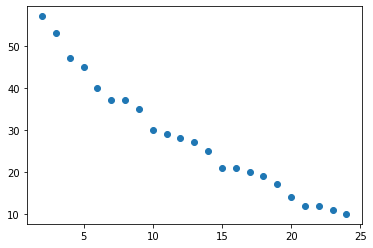

In [ ]:
def optimal_prob_df(globalmin = 0.53, globalmax=0.7, localmin=0.2, localmax=0.49, acc_bound = 0.2, av_bound = 100):
    lst_of_prob = []

    cols = ["prob", "global", "local","accuracy", "av global", "av local" ]


    prob_array = np.array(range(2,25,1))
    print(prob_array)
    glob_array = np.arange(globalmin,globalmax,0.02)
    print(glob_array)
    loc_array = np.arange(localmin,localmax,0.02)
    samples = len(glob_array)*len(loc_array)
    print(samples)
    print(loc_array)
    amount_of_true_lst=[]
    for p in prob_array:
        d_for_accuracy = []
        for x in glob_array:
            for y in loc_array:
              acc, av_global, av_local = df_average(N=100, global_s=x, local_s=y, p_global=p)
              if acc > acc_bound:
                  d_for_accuracy.append([x,y,False, acc, av_global, av_local])
              else:
                  d_for_accuracy.append([x,y,True, acc, av_global, av_local])
        print(d_for_accuracy)
        prob_work_array = np.array([d_for_accuracy[i][2] for i in range(samples)])
        print('probabililty is',p)
        print(prob_work_array)
        total_true = prob_work_array.sum()
        amount_of_true_lst.append(total_true)
        print('amount of true is', total_true)
    amount_of_true_array = np.array(amount_of_true_lst)
    print(amount_of_true_array)
    plt.scatter(prob_array, amount_of_true_array)
    plt.show()
                #d.append([p,x,y,acc])
    #optimal_df = pd.DataFrame(data=d, columns=cols)
    return

optimal_prob_df()

In [ ]:
#optimal_prob_by_average
def optimal_prob_by_average(globalmin = 0.53, globalmax=0.7, localmin=0.2, localmax=0.49, average_bound = 200):
    lst_of_prob = []

    cols = ["prob", "global", "local","accuracy"]


    prob_array = np.array(range(2,25,1))
    print(prob_array)
    glob_array_for_av = np.arange(globalmin,globalmax,0.02)
    print(glob_array_for_av)
    loc_array = np.arange(localmin,localmax,0.02)
    samples = len(glob_array_for_av)*len(loc_array_for_av)
    print(samples)
    print(loc_array)
    amount_of_true_lst=[]
    for p in prob_array:
        d = []
        for x in glob_array:
            for y in loc_array:
                acc = df_accuracy(N=100, global_s=x, local_s=y, p_global=p)
                if acc > acc_bound:
                    d.append([x,y,False, acc])
                else:
                    d.append([x,y,True, acc])
        print(d)
        prob_work_array = np.array([d[i][2] for i in range(samples)])
        print('probabililty is',p)
        print(prob_work_array)
        total_true = prob_work_array.sum()
        amount_of_true_lst.append(total_true)
        print('amount of true is', total_true)
    amount_of_true_array = np.array(amount_of_true_lst)
    print(amount_array)
    plt.scatter(prob_array, amount_of_true_array)
    plt.show()
                #d.append([p,x,y,acc])
    #optimal_df = pd.DataFrame(data=d, columns=cols)
    return